#Mini-Projeto FIFA World Cup 


## Tratamento de Dados

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FIFA - 2006.csv to FIFA - 2006 (1).csv
Saving FIFA - 2010.csv to FIFA - 2010 (1).csv
Saving FIFA - 2014.csv to FIFA - 2014 (1).csv
Saving FIFA - 2018.csv to FIFA - 2018 (1).csv


In [ ]:
#fazendo o tratamento dos arquivos csv

numlist = ['06','10','14','18'] #dois ultimos numeros de cada ano da copa

goalsfor_value = [] #lista para a variável de interesse Goals For
goalsag_value = [] #lista para a variável de interesse Goals Against

for num in numlist:
  #usecols para pegar as colunas goals for e goals against e nrows para pegar os 15 primeiros colocados
  wc_data = pd.read_csv(io.BytesIO(uploaded[f'FIFA - 20{num}.csv']), index_col = 'Position', usecols=['Position','Goals For','Goals Against'], nrows = 15)

  goalsfor = wc_data['Goals For'].tolist()
  goalsfor_value.extend(goalsfor) #concatena os valores goalsfor em uma lista geral das variáveis

  goalsag = wc_data['Goals Against'].tolist()
  goalsag_value.extend(goalsag) #concatena os valores goalsagainst em uma lista geral das variáveis

print(list(goalsfor_value))
print(list(goalsag_value))

[12, 9, 14, 7, 10, 11, 6, 5, 9, 4, 3, 5, 4, 3, 5, 8, 12, 16, 11, 10, 9, 5, 3, 4, 3, 7, 5, 3, 4, 6, 18, 8, 15, 11, 12, 6, 10, 5, 6, 5, 7, 4, 3, 7, 5, 14, 14, 16, 12, 7, 8, 6, 11, 6, 3, 3, 7, 6, 5, 6]
[2, 3, 6, 5, 2, 3, 2, 7, 4, 0, 2, 4, 6, 4, 5, 2, 6, 5, 8, 6, 4, 4, 2, 2, 5, 1, 5, 5, 5, 8, 4, 4, 4, 14, 4, 3, 3, 2, 4, 3, 7, 6, 5, 7, 6, 6, 9, 6, 8, 3, 3, 4, 7, 3, 6, 2, 6, 6, 5, 9]



## Análise Estatística

In [ ]:
df_gfor = pd.DataFrame(data=goalsfor_value) #creating a dataframe from our variables list
sdgo_for = df_gfor.std() #using the std function to get the standard deviation
meango_for = df_gfor.mean() #using the mean function to get the mean

df_gagsnt = pd.DataFrame(goalsag_value)
sdgo_ag = df_gagsnt.std()
meango_ag = df_gagsnt.mean()

print(f'A lista de variáveis "Goals For" tem Desvio Padrão igual a {sdgo_for[0]} e Média de valor {meango_for[0]}')
print(f'A lista de variáveis "Goals Against" tem Desvio Padrão igual a {sdgo_ag[0]} e Média de valor {meango_ag[0]}')

A lista de variáveis "Goals For" tem Desvio Padrão igual a 3.887507152971783 e Média de valor 7.65
A lista de variáveis "Goals Against" tem Desvio Padrão igual a 2.352784142317136 e Média de valor 4.7


In [ ]:
#funcao de limite minimo
def lim_min(std, mean):
  lim_inf = mean - (3*std)
  return lim_inf

#funcao de limite maximo
def lim_max(std, mean):
  lim_sup = mean + (3*std)
  return lim_sup

#limite superior e inferior da goals for list
inf_gfor = lim_min(sdgo_for, meango_for)
sup_gfor = lim_max(sdgo_for, meango_for)

#limite superior e inferior da goals against list
inf_gag = lim_min(sdgo_ag, meango_ag)
sup_gag = lim_max(sdgo_ag, meango_ag)

print(f'"Goals For" tem como limite superior o valor {sup_gfor[0]} e como limite inferior o valor de {inf_gfor[0]}')
print(f'"Goals Against" tem como limite superior o valor {sup_gag[0]} e como limite inferior o valor de {inf_gag[0]}')


"Goals For" tem como limite superior o valor 19.31252145891535 e como limite inferior o valor de -4.01252145891535
"Goals Against" tem como limite superior o valor 11.758352426951408 e como limite inferior o valor de -2.3583524269514085


## Plotagem de Gráficos

### Gráfico de linha - "Goals For" 


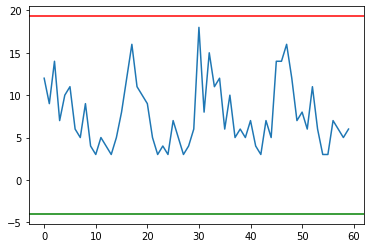

In [ ]:
plt.axhline(y = sup_gfor[0], color = 'r', linestyle = '-') #limite superior
plt.axhline(y = inf_gfor[0], color = 'g', linestyle = '-') #limite inferior

plt.plot(goalsfor_value)
plt.show()

### Gráfico de linha - "Gols Against"

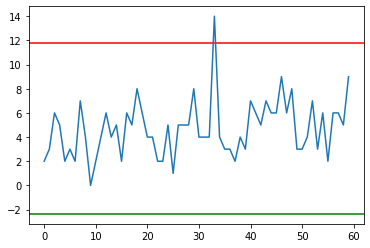

In [ ]:
plt.axhline(y = sup_gag[0], color = 'r', linestyle = '-') #limite superior
plt.axhline(y = inf_gag[0], color = 'g', linestyle = '-') #limite inferior

plt.plot(goalsag_value)
plt.show()